In [3]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Note that we also import below. This is only here if we have to restart the kernel
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from joblib import parallel_backend

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X, Y = ml.shuffleData(X, Y)

for i in range(14):
    Xi = X[:,i]
    print(f"Feature {i + 1}:")
    print(f"\tMin: {min(Xi):f}")
    print(f"\tMax: {max(Xi):f}")
    print(f"\tMean: {np.mean(Xi):f}")
    print(f"\tVariance: {np.var(Xi):f}")
    
print("Y:")
print(f"\tMin: {min(Y):f}")
print(f"\tMax: {max(Y):f}")
print(f"\tMean: {np.mean(Y):f}")
print(f"\tVariance: {np.var(Y):f}")

def split_simple():
    return X[:10000], X[10000:20000], Y[:10000], Y[10000:20000]

def split_sklearn():
    return train_test_split(X, Y, train_size=0.67, random_state=42, stratify=Y)

#Xtr, Xva, Ytr, Yva = split_simple()
Xtr, Xva, Ytr, Yva = split_sklearn()

Feature 1:
	Min: 0.875890
	Max: 19.167000
	Mean: 6.498653
	Variance: 6.405048
Feature 2:
	Min: 0.000000
	Max: 9238.000000
	Mean: 138.093830
	Variance: 443951.746446
Feature 3:
	Min: 0.000000
	Max: 13630.000000
	Mean: 928.259020
	Variance: 3081761.816949
Feature 4:
	Min: 0.000000
	Max: 13.230000
	Mean: 2.097139
	Variance: 4.363440
Feature 5:
	Min: 152.500000
	Max: 252.500000
	Mean: 232.826768
	Variance: 97.625732
Feature 6:
	Min: 0.990490
	Max: 975.040000
	Mean: 10.271590
	Variance: 404.646245
Feature 7:
	Min: 10.000000
	Max: 31048.000000
	Mean: 3089.923365
	Variance: 15651513.756432
Feature 8:
	Min: 0.000000
	Max: 73.902000
	Mean: 2.691718
	Variance: 2.198778
Feature 9:
	Min: 214.250000
	Max: 252.500000
	Mean: 241.554151
	Variance: 35.286340
Feature 10:
	Min: 0.000000
	Max: 66.761000
	Mean: 4.217660
	Variance: 4.086372
Feature 11:
	Min: 193.500000
	Max: 253.000000
	Mean: 241.601104
	Variance: 83.499171
Feature 12:
	Min: 0.000000
	Max: 125.170000
	Mean: 3.248579
	Variance: 8.219485
Feat

In [5]:
from sklearn.metrics import roc_auc_score

def get_err(learner, X, Y):
    try:
        return learner.err(X, Y)
    except:
        return 1 - learner.score(X, Y)
    
def get_auc(learner, X, Y):
    try:
        return learner.auc(X, Y)
    except:
        return roc_auc_score(Y, learner.predict_proba(X)[:,1])
    
def graph_me(var, range_, classify_func, range_func=lambda _:_):
    plt.title(f"Error given {var}")
    Xplot = []
    Ytrplot = []
    Yvaplot = []
    for i in range_:
        print(f"Processing {range_func(i)}")
        learner = classify_func(range_func(i))
        Xplot.append(range_func(i))
        Ytrplot.append(get_err(learner, Xtr, Ytr))
        Yvaplot.append(get_err(learner, Xva, Yva))
    plt.xticks(Xplot)
    plt.plot(Xplot, Ytrplot, color='r')
    plt.plot(Xplot, Yvaplot, color='g')
    #plt.plot(Xplot, np.array(Ytrplot) + Yvaplot, color='b')
    #plt.legend(["Training", "Validation", "Sum"]);
    plt.legend(["Training", "Validation"]);
    
def print_auc(learner):
    print(f"The error on the training data is {get_err(learner, Xtr, Ytr):0.4}")
    print(f"The error on the validation data is {get_err(learner, Xva, Yva):0.4}")
    print(f"The AUC score for the training data is {get_auc(learner, Xtr, Ytr):0.4}")
    print(f"The AUC score for the validation data is {get_auc(learner, Xva, Yva):0.4}")

In [6]:
def create_AdaBoost(*kargs, **kwargs):
    learner = AdaBoostClassifier(*kargs, random_state=0, n_jobs=-1, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

def create_DecisionTree(**kwargs):
    learner = DecisionTreeClassifier(random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

def create_MLP(**kwargs):
    learner = MLPClassifier(random_state=0, n_jobs=-1, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

def create_RandomForest(**kwargs):
    learner = RandomForestClassifier(random_state=0, n_jobs=-1, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

# Basic Decision Tree

Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6


KeyboardInterrupt: 

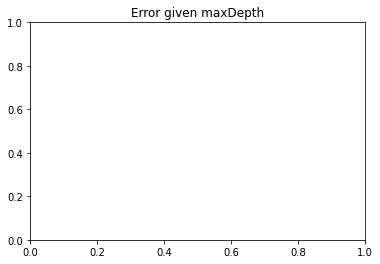

In [7]:
graph_me("maxDepth", range(16), lambda i: ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i))

In [ ]:
graph_me("minParent", range(2,11), lambda i: ml.dtree.treeClassify(Xtr, Ytr, minParent=i), lambda _: 2**_)

In [ ]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=8, minParent=512)
print_auc(learner)

# Basic Neural Network

In [ ]:
nn = ml.nnet.nnetClassify()
nn.set_layers([14, 100, 100, 2])
nn.train(Xtr, Ytr, init='random')
print_auc(nn)

In [ ]:
nn = ml.nnet.nnetClassify()
nn.set_layers([14, 300, 2])
nn.train(Xtr, Ytr, init='random')
print_auc(nn)

# AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier
def create_AdaBoost(*kargs, **kwargs):
    learner = AdaBoostClassifier(*kargs, random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

Processing 10
Processing 20
Processing 30
Processing 40
Processing 50
Processing 60
Processing 70
Processing 80
Processing 90
Processing 100
Processing 110
Processing 120
Processing 130
Processing 140
Processing 150


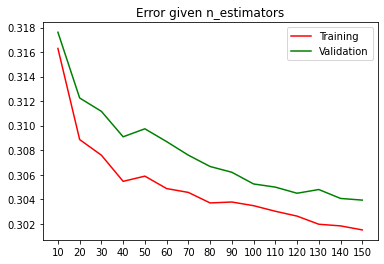

In [9]:
graph_me("n_estimators", range(1, 16), lambda i: create_AdaBoost(n_estimators=i), lambda _:_*10)

# Sklearn's Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def create_DecisionTree(**kwargs):
    learner = DecisionTreeClassifier(random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

print_auc(create_DecisionTree(max_depth=8))

In [ ]:
graph_me("max_depth", range(1,16), lambda i: create_DecisionTree(max_depth=i))

In [ ]:
graph_me("min_samples_split", range(2,11), lambda i: create_DecisionTree(min_samples_split=i))

In [ ]:
graph_me("min_samples_leaf", range(2,11), lambda i: create_DecisionTree(min_samples_leaf=i))

In [ ]:
print("Max Features: None")
learner = create_DecisionTree(max_features=None)
print_auc(learner)
print()
print("Max Features: Auto")
learner = create_DecisionTree(max_features="auto")
print_auc(learner)
print()
print("Max Features: log2")
learner = create_DecisionTree(max_features="log2")
print_auc(learner)

In [ ]:
graph_me("max_leaf_nodes", range(2,11), lambda i: create_DecisionTree(max_leaf_nodes=i))

In [ ]:
learner = create_DecisionTree(max_depth=14, max_features="auto")
print_auc(learner)

In [ ]:
# Weird since adding max_leaf_nodes decreases AUC but decreases error too
graph_me("max_leaf_nodes", range(2,11), lambda i: create_DecisionTree(max_depth=14, max_features="auto", max_leaf_nodes=i))

# AdaBoost with Tweaked Decision Tree

Processing 10
Processing 20


KeyboardInterrupt: 

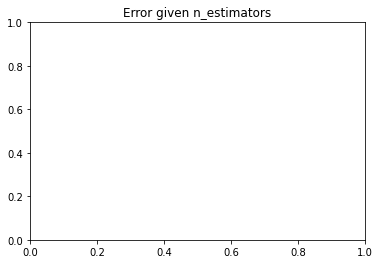

In [11]:
dtree = create_DecisionTree(max_depth=14, max_features="auto")
#print_auc(dtree)
graph_me("n_estimators", range(1, 16), lambda i: create_AdaBoost(dtree, n_estimators=i), lambda _:_*10)

In [ ]:
learner = create_AdaBoost(dtree, n_estimators=150)
print_auc(learner)

# Sklearn's Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

def create_MLP(**kwargs):
    learner = MLPClassifier(random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

In [ ]:
learner = create_MLP()
print_auc(learner)

In [ ]:
learner = create_MLP(hidden_layer_sizes=(100,100))
print_auc(learner)

# Automatic Model Selection

In [ ]:
# This does not perform as well as I'd hope
# AUC of 0.5, or no better than a random guess

#Xtr, Xva, Ytr, Yva = split_simple()
#from autosklearn.classification import AutoSklearnClassifier

#learner = AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30)
#learner.fit(Xtr, Ytr)
#print_auc(learner)
#Xtr, Xva, Ytr, Yva = split_sklearn()

In [ ]:
# Uncomment the next lines to run this.
# It will take long. It took a bit more than an hour to run this on a 16-core CPU
#from tpot import TPOTClassifier
#learner = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=0, scoring='roc_auc', n_jobs=-1)
#learner.fit(Xtr, Ytr)
#print_auc(learner)
#learner.export("pipeline_split_sklearn.py")

# Best pipeline: ExtraTreesClassifier(Normalizer(input_matrix, norm=l1), bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=2, min_samples_split=12, n_estimators=100)
# The error on the training data is 0.04156
# The error on the validation data is 0.2211
# The AUC score for the training data is 0.9584
# The AUC score for the validation data is 0.7789

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def create_RandomForest(**kwargs):
    learner = RandomForestClassifier(random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

Processing 10
Processing 20
Processing 30


KeyboardInterrupt: 

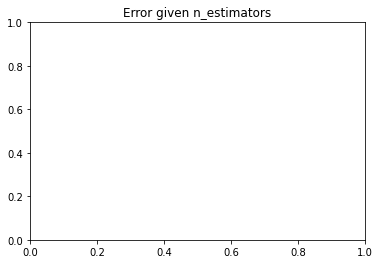

In [15]:
graph_me("n_estimators", range(1, 16), lambda i: create_RandomForest(n_estimators=i), lambda _:_*10)

In [ ]:
graph_me("max_depth", range(1,16), lambda i: create_RandomForest(max_depth=i))

In [ ]:
print("Max Features: None")
learner = create_RandomForest(max_features=None)
print_auc(learner)
print()
print("Max Features: Auto")
learner = create_RandomForest(max_features="auto")
print_auc(learner)
print()
print("Max Features: log2")
learner = create_RandomForest(max_features="log2")
print_auc(learner)
print()
print("Max Features: 0.05")
learner = create_RandomForest(max_features=0.05)
print_auc(learner)

In [ ]:
graph_me("min_samples_leaf", range(2,11), lambda i: create_RandomForest(min_samples_leaf=i))

In [ ]:
graph_me("min_samples_split", range(2,11), lambda i: create_RandomForest(min_samples_leaf=i))

In [ ]:
learner = create_RandomForest(max_depth=14, max_features="auto")
print_auc(learner)

In [ ]:
learner = create_RandomForest(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100)
print_auc(learner)

In [ ]:
learner = create_RandomForest(bootstrap=False, max_features="auto", min_samples_leaf=8, min_samples_split=14, n_estimators=100)
print_auc(learner)

# Preprocessed - Normalized

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

pipe = make_pipeline(
    Normalizer(),
    DecisionTreeClassifier(max_depth=14, max_features="auto", random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
dtree = create_DecisionTree(max_depth=14, max_features="auto")
pipe = make_pipeline(
    Normalizer(),
    AdaBoostClassifier(dtree, n_estimators=150, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
pipe = make_pipeline(
    Normalizer(),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

# Preprocessed - Standard

In [ ]:
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=14, max_features="auto", random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
dtree = create_DecisionTree(max_depth=14, max_features="auto")
pipe = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(dtree, n_estimators=150, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

# Preprocessed - MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pipe = make_pipeline(
    MinMaxScaler(),
    DecisionTreeClassifier(max_depth=14, max_features="auto", random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
dtree = create_DecisionTree(max_depth=14, max_features="auto")
pipe = make_pipeline(
    MinMaxScaler(),
    AdaBoostClassifier(dtree, n_estimators=150, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
pipe = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

# Preprocessed - Quantile

In [ ]:
# Just import the rest
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

pipe = make_pipeline(
    QuantileTransformer(),
    DecisionTreeClassifier(max_depth=14, max_features="auto", random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
dtree = create_DecisionTree(max_depth=14, max_features="auto")
pipe = make_pipeline(
    QuantileTransformer(),
    AdaBoostClassifier(dtree, n_estimators=150, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

In [ ]:
pipe = make_pipeline(
    QuantileTransformer(),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

# Preprocessing

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

dtree = create_DecisionTree(max_depth=14, max_features="auto")
decision_classifier = DecisionTreeClassifier(max_depth=14, max_features="auto", random_state=0)
adaboost_classifier = AdaBoostClassifier(dtree, n_estimators=150, random_state=0)
random_forest_classifier = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.05, min_samples_leaf=8, min_samples_split=14, n_estimators=100, random_state=0)
extra_trees_classifier = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=1.0, min_samples_leaf=2, min_samples_split=12, n_estimators=100, random_state=0)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from joblib import parallel_backend

processors = [
    ("Normalized", Normalizer()),
    ("Normalized l1", Normalizer('l1')),
    ("Normalized max", Normalizer('max')),
    ("Standard", StandardScaler()),
    ("Standard nostd", StandardScaler(with_std=False)),
    ("MinMax", MinMaxScaler()),
    ("Quantile", QuantileTransformer()),
    ("Quantile Normal", QuantileTransformer(output_distribution='normal')),
    ("Max Abs", MaxAbsScaler()),
    ("Robust", RobustScaler()),
    ("Robust nocenter", RobustScaler(with_centering=False)),
    ("Robust noscale", RobustScaler(with_scaling=False)),
    ("Robust neither", RobustScaler(with_centering=False, with_scaling=False)),
    ("Robust variance", RobustScaler(unit_variance=True)),
    ("Power", PowerTransformer())
]

classifiers = [
    ("Decision", decision_classifier),
    ("AdaBoost", adaboost_classifier),
    ("Random Forest", random_forest_classifier),
    ("Extra Trees", extra_trees_classifier)
]

for cname, classifier in classifiers:
    print(cname)
    for name, processor in processors:
        with parallel_backend('threading', n_jobs=-1):
            pipe = make_pipeline(
                processor,
                classifier
            )
            pipe.fit(Xtr, Ytr)
            print(f"{name} - AUC of validation: {get_auc(pipe, Xva, Yva):0.4}")

# Gradient Boosting Test/Validation Error Rates

In [20]:
def create_gradientboost(**kwargs):
    learner = GradientBoostingClassifier(random_state=0, **kwargs)
    learner.fit(Xtr, Ytr)
    return learner

In [21]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


#clf = GradientBoostingClassifier(n_estimators=400, learning_rate=1.0, max_depth=5, random_state=0).fit(Xtr, Ytr)
#clf.score(Xva, Yva)

Processing 10
Processing 20
Processing 30
Processing 40
Processing 50
Processing 60
Processing 70
Processing 80
Processing 90
Processing 100
Processing 110
Processing 120
Processing 130
Processing 140
Processing 150
Processing 160
Processing 170
Processing 180
Processing 190
Processing 200
Processing 210
Processing 220
Processing 230
Processing 240
Processing 250
Processing 260
Processing 270
Processing 280
Processing 290


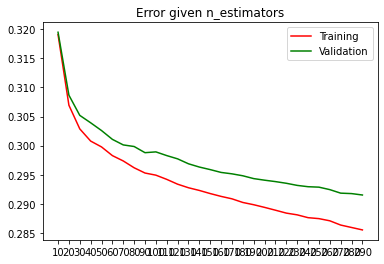

In [25]:
graph_me("n_estimators", range(1,30), lambda i: create_gradientboost(n_estimators=i), lambda _:_*10)

Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15


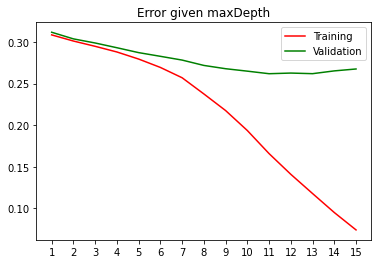

In [29]:
graph_me("maxDepth", range(1,16), lambda i: create_gradientboost(max_depth=i))

Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10


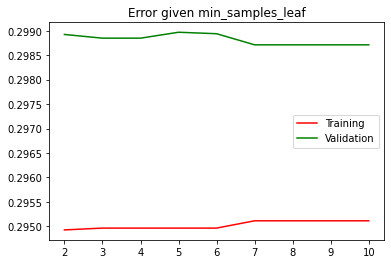

In [30]:
graph_me("min_samples_leaf", range(2,11), lambda i: create_gradientboost(min_samples_leaf=i))

Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10


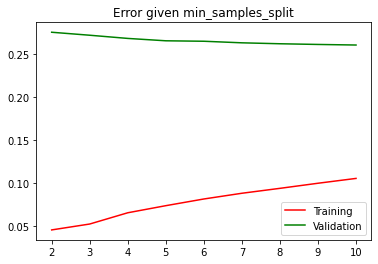

In [31]:
graph_me("min_samples_split", range(2,11), lambda i: create_RandomForest(min_samples_split=i))

In [35]:
learner = create_gradientboost(max_depth=14, min_samples_leaf=8, min_samples_split=16, n_estimators=250, random_state=0)
print_auc(learner)

The error on the training data is 0.09472
The error on the validation data is 0.2581
The AUC score for the training data is 0.9732
The AUC score for the validation data is 0.7837


In [36]:
from sklearn.preprocessing import MinMaxScaler

pipe = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=16, n_estimators=250, random_state=0)
)
pipe.fit(Xtr, Ytr)
print_auc(pipe)

The error on the training data is 0.09472
The error on the validation data is 0.258
The AUC score for the training data is 0.9732
The AUC score for the validation data is 0.7837
